In [197]:
import numpy as np
import pandas as pd
import scipy
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [199]:
pathdir='/content/drive/MyDrive/ULPGC/Ecosist/poster/'

ds_cyan_10 = xr.open_dataset(pathdir+"Cyano_mon_2010.nc")
ds_cyan_15 = xr.open_dataset(pathdir+"Cyano_mon_2015.nc")
ds_diato_10 = xr.open_dataset(pathdir+"diato_mon_2010.nc")
ds_diato_15 = xr.open_dataset(pathdir+"diato_mon_2015.nc")
ds_Fe_NO_10 = xr.open_dataset(pathdir+"Fe_NO_mon_2010.nc")
ds_Fe_NO_15 = xr.open_dataset(pathdir+"Fe_NO_mon_2015.nc")

In [200]:
#extreamos los atributos
atrs_NO_10 = ds_Fe_NO_10.no3.attrs
atrs_Fe_10 = ds_Fe_NO_10.fe.attrs
atrs_NO_15 = ds_Fe_NO_15.no3.attrs
atrs_Fe_15 = ds_Fe_NO_15.fe.attrs

In [201]:
#con aqui perdemos los atributos pero igual los tenemos ya guadados
ds_Fe_NO_10 = ds_Fe_NO_10.sel(depth=slice(0,500)).mean(dim=['depth', 'latitude', 'longitude'])
ds_Fe_NO_15 = ds_Fe_NO_15.sel(depth=slice(0,500)).mean(dim=['depth', 'latitude', 'longitude'])

In [202]:
ds_cyan_10

<xarray.Dataset>
Dimensions:             (nv: 2, time: 12)
Coordinates:
  * time                (time) datetime64[ns] 2010-01-01 ... 2010-12-01
Dimensions without coordinates: nv
Data variables:
    NOBM_MON_R2017_cya  (time) float32 ...
    datamonth           (time) int32 ...
    time_bnds           (time, nv) datetime64[ns] ...
Attributes: (12/23)
    nco_openmp_thread_number:    1
    Conventions:                 CF-1.4
    temporal_resolution:         monthly
    nco_input_file_number:       1
    nco_input_file_list:         ./file_NOBM_MON_R2017_cya_1_avg.nc
    geospatial_lat_min:          -1.33333
    ...                          ...
    NCO:                         netCDF Operators version 4.7.8 (Homepage = h...
    history:                     Sat Dec  4 19:10:21 2021: /usr/bin/ncatted -...
    plot_hint_time_axis_values:  1262304000,1267401600,1272672000,1277942400,...
    plot_hint_time_axis_labels:  Jan,Mar,May,Jul,Sep,Nov,Jan~C~2011
    plot_hint_time_axis_minor:   1264982400,1270080000,1275350400,1280620800,...
    plot_hint_caption:           - The user-selected region was defined by 92...

In [203]:
#agregamos los atributos que habiamos salvado
ds_Fe_NO_10.no3.attrs = atrs_NO_10
ds_Fe_NO_10.fe.attrs = atrs_Fe_10
ds_Fe_NO_15.no3.attrs = atrs_NO_15
ds_Fe_NO_15.fe.attrs = atrs_Fe_15

In [204]:
ds_Fe_NO_15

<xarray.Dataset>
Dimensions:  (time: 12)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2015-12-16T12:00:00
Data variables:
    no3      (time) float32 14.15 14.32 14.12 13.14 ... 12.62 12.33 12.17 12.01
    fe       (time) float32 0.0004411 0.0004532 ... 0.0004466 0.0004348

In [205]:
NO_10 = ds_Fe_NO_10.no3.data
NO_15 = ds_Fe_NO_15.no3.data
Fe_10 = ds_Fe_NO_10.fe.data
Fe_15 = ds_Fe_NO_15.fe.data
cyan_10 = ds_cyan_10.NOBM_MON_R2017_cya.data
cyan_15 = ds_cyan_15.NOBM_MON_R2017_cya.data
diato_10 = ds_diato_10.NOBM_MON_R2017_dia.data
diato_15 = ds_diato_15.NOBM_MON_R2017_dia.data

## 2010

In [206]:
idx_date10 = [pd.to_datetime(mes).strftime('%B,%Y') for mes in ds_cyan_10.time.data]
df2010 = pd.DataFrame({'NO_10': NO_10,
                       'Fe_10': Fe_10,
                       'cyan_10': cyan_10,
                       'diato_10': diato_10,
                       'date': idx_date10}).set_index(['date'])
df2010
df2010.to_csv(pathdir+'data2010.csv')

In [207]:
df2010.describe()

,NO_10,Fe_10,cyan_10,diato_10
count,12.000000,12.000000,12.000000,12.000000
mean,15.125991,0.000460,0.059685,0.086362
std,1.045676,0.000028,0.017034,0.030077
min,13.704165,0.000421,0.036255,0.040104
25%,14.091408,0.000433,0.043619,0.067497
50%,15.145402,0.000471,0.061393,0.082970
75%,15.786297,0.000483,0.073639,0.113316
max,16.962337,0.000492,0.086004,0.130648


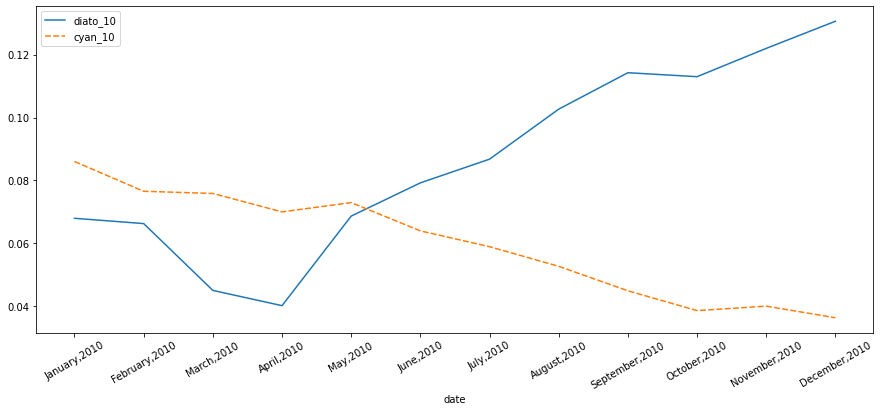

In [208]:
plt.figure(figsize = (15,6));
ax = sns.lineplot(data=df2010[['diato_10', 'cyan_10']]);
plt.xticks(rotation=30);

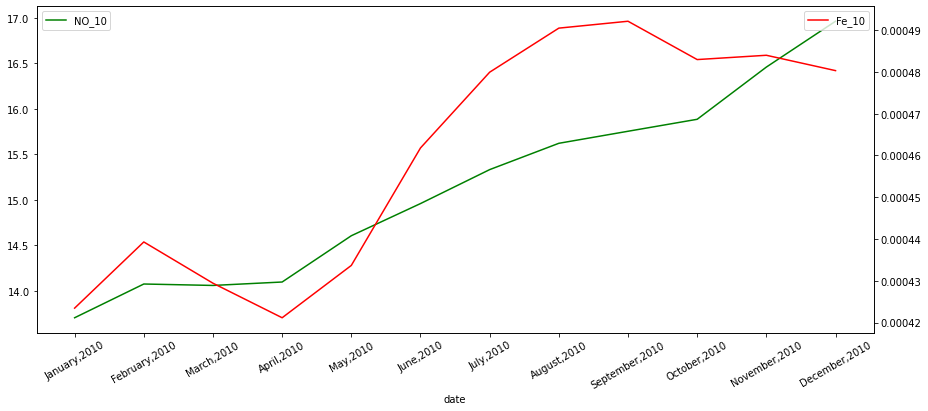

In [209]:
fig, ax1 = plt.subplots()
fig.set_size_inches(15, 6)
ax2 = ax1.twinx()
sns.lineplot(data=df2010[['NO_10']], ax= ax1);
sns.lineplot(data=df2010[['Fe_10']], ax= ax2);
#cambiar color de la line y la legenda
ax1.get_lines()[0].set_color('green')
ax1.get_legend().legendHandles[0].set_color('green')
ax2.get_lines()[0].set_color('red')
ax2.get_legend().legendHandles[0].set_color('red')
ax1.tick_params(axis='x', rotation=30);

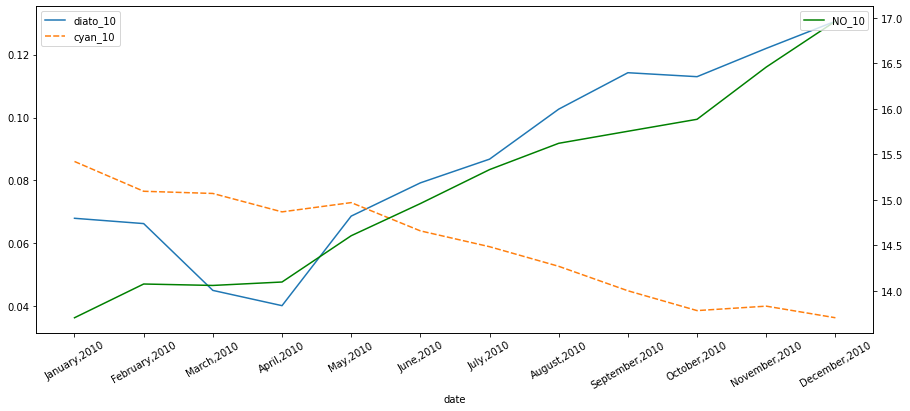

In [210]:
fig, ax1 = plt.subplots()
fig.set_size_inches(15, 6)
ax2 = ax1.twinx()
sns.lineplot(data=df2010[['diato_10', 'cyan_10']], ax= ax1);
sns.lineplot(data=df2010[['NO_10']], ax= ax2);
#cambiar color de la line y la legenda
ax2.get_lines()[0].set_color('green')
ax2.legend(loc='upper right')
ax2.get_legend().legendHandles[0].set_color('green')
ax1.tick_params(axis='x', rotation=30);

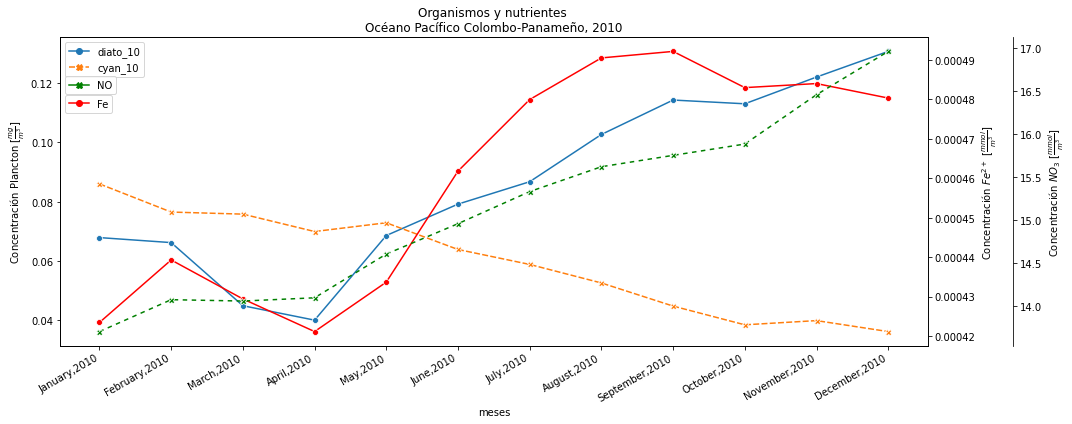

In [211]:
from mpl_toolkits.axes_grid1 import host_subplot

fig = plt.figure()
host = fig.add_subplot(111)
plt.rcParams["figure.figsize"] = (16, 6)
fig.set_size_inches(15, 6)

ax2 = host.twinx()
ax3 = host.twinx()

#Titulos
host.set_title("Organismos y nutrientes \nOcéano Pacífico Colombo-Panameño, 2010")
host.set_ylabel(r'Concentración Plancton $[\frac{mg}{m^3}]$')
host.set_xlabel(r'meses')
ax2.set_ylabel(r'Concentración $Fe^{2+}$ $[\frac{mmol}{m^3}]$')
ax3.set_ylabel(r'Concentración $NO_3$ $[\frac{mmol}{m^3}]$')
#Off-set del eje y
offset = 85
ax3.spines['right'].set_position(('outward', offset))  

#Plots
sns.lineplot(data=df2010[['diato_10', 'cyan_10']], markers= True, ax= host);
sns.lineplot(data=df2010[['Fe_10']], markers=True, ax= ax2);
sns.lineplot(data=df2010[['NO_10']], markers=['X'], dashes= [(3, 3)], ax= ax3);

#Legenda
ax2.get_lines()[0].set_color('red')
ax2.legend(handles=[plt.Line2D([],[], marker="o", color="red")], 
           loc='upper left', bbox_to_anchor=(0., 0.33, 0.5, 0.5), labels=('Fe',))

ax3.get_lines()[0].set_color('green')
ax3.legend(handles=[plt.Line2D([],[], marker="X", color="green")],
           loc='upper left', bbox_to_anchor=(0., 0.39, 0.5, 0.5), labels=('NO',))

fig.autofmt_xdate()
plt.tight_layout()
plt.savefig(pathdir+"ts_2010.png", dpi=300)
plt.show()

## 2015

In [212]:
idx_date15 = [pd.to_datetime(mes).strftime('%B,%Y') for mes in ds_cyan_15.time.data]
df2015 = pd.DataFrame({'NO_15': NO_15,
                       'Fe_15': Fe_15,
                       'cyan_15': cyan_15,
                       'diato_15': diato_15,
                       'date': idx_date15}).set_index(['date'])
df2015
df2015.to_csv(pathdir+'data2015.csv')

In [213]:
df2015.describe()

,NO_15,Fe_15,cyan_15,diato_15
count,12.000000,12.000000,12.000000,12.000000
mean,12.914650,0.000434,0.079208,0.056118
std,0.829790,0.000018,0.025532,0.041063
min,12.013481,0.000400,0.047823,0.019574
25%,12.315834,0.000422,0.055684,0.028809
50%,12.569445,0.000438,0.076229,0.042047
75%,13.388502,0.000448,0.106335,0.061234
max,14.322478,0.000453,0.114457,0.135831


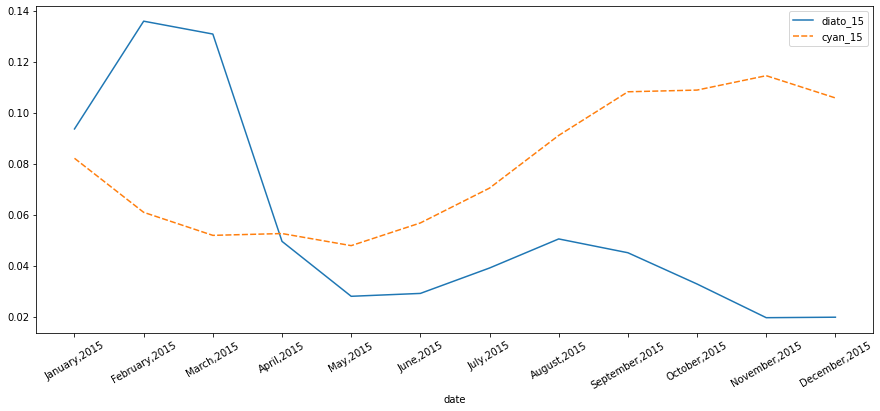

In [214]:
plt.figure(figsize = (15,6));
ax = sns.lineplot(data=df2015[['diato_15', 'cyan_15']]);
plt.xticks(rotation=30);

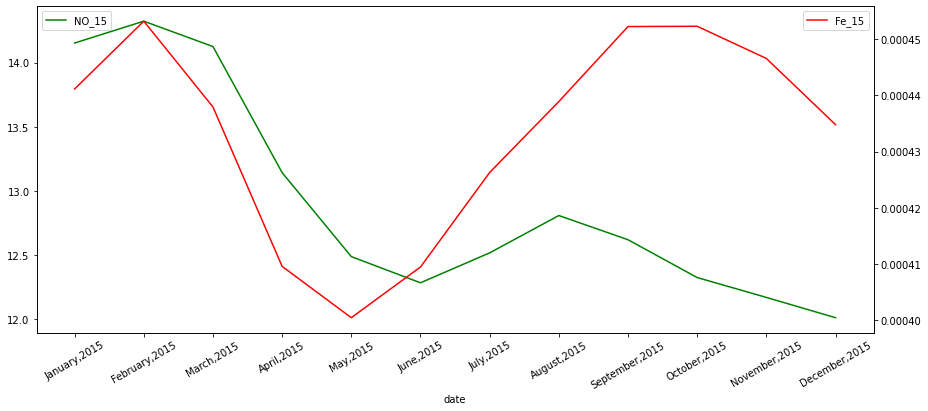

In [215]:
fig, ax1 = plt.subplots()
fig.set_size_inches(15, 6)
ax2 = ax1.twinx()
sns.lineplot(data=df2015[['NO_15']], ax= ax1);
sns.lineplot(data=df2015[['Fe_15']], ax= ax2);
#cambiar color de la line y la legenda
ax1.get_lines()[0].set_color('green')
ax1.legend(loc='upper left')
ax1.get_legend().legendHandles[0].set_color('green')
ax2.get_lines()[0].set_color('red')
ax2.get_legend().legendHandles[0].set_color('red')
ax1.tick_params(axis='x', rotation=30);

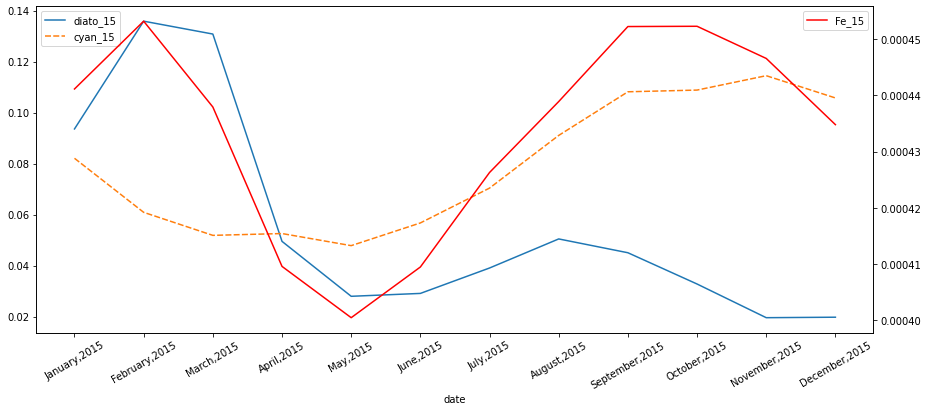

In [216]:
fig, ax1 = plt.subplots()
fig.set_size_inches(15, 6)
ax2 = ax1.twinx()
sns.lineplot(data=df2015[['diato_15', 'cyan_15']], ax= ax1);
sns.lineplot(data=df2015[['Fe_15']], ax= ax2);
#cambiar color de la line y la legenda
ax1.legend(loc='upper left')
ax2.get_lines()[0].set_color('red')
ax2.get_legend().legendHandles[0].set_color('red')
ax1.tick_params(axis='x', rotation=30);

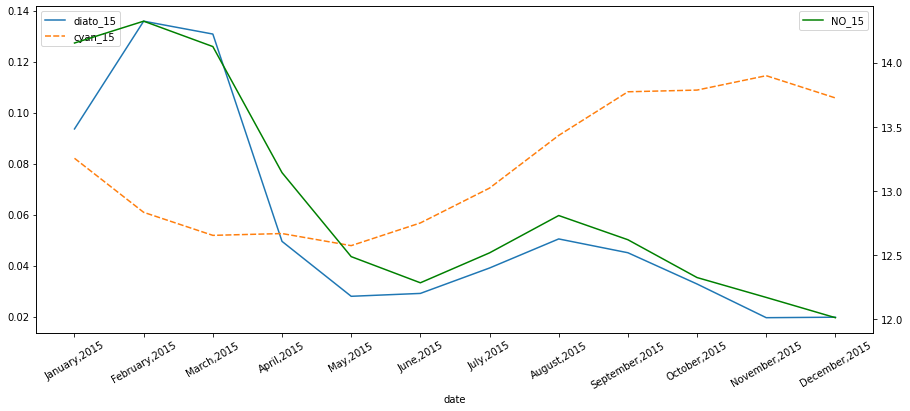

In [217]:
fig, ax1 = plt.subplots()
fig.set_size_inches(15, 6)
ax2 = ax1.twinx()
sns.lineplot(data=df2015[['diato_15', 'cyan_15']], ax= ax1);
sns.lineplot(data=df2015[['NO_15']], ax= ax2);
#cambiar color de la line y la legenda
ax2.get_lines()[0].set_color('green')
ax1.legend(loc='upper left')
ax2.get_legend().legendHandles[0].set_color('green')
ax1.tick_params(axis='x', rotation=30);

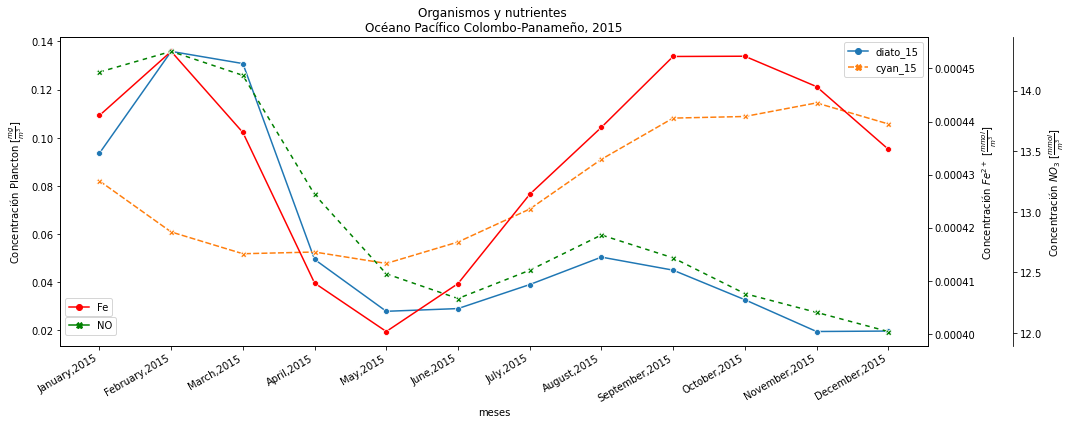

In [218]:
from mpl_toolkits.axes_grid1 import host_subplot

fig = plt.figure()
host = fig.add_subplot(111)
plt.rcParams["figure.figsize"] = (16, 6)
fig.set_size_inches(15, 6)

ax2 = host.twinx()
ax3 = host.twinx()

#Titulos
host.set_title("Organismos y nutrientes \nOcéano Pacífico Colombo-Panameño, 2015")
host.set_ylabel(r'Concentración Plancton $[\frac{mg}{m^3}]$')
host.set_xlabel(r'meses')
ax2.set_ylabel(r'Concentración $Fe^{2+}$ $[\frac{mmol}{m^3}]$')
ax3.set_ylabel(r'Concentración $NO_3$ $[\frac{mmol}{m^3}]$')
#Off-set del eje y
offset = 85
ax3.spines['right'].set_position(('outward', offset))  

#Plots
sns.lineplot(data=df2015[['diato_15', 'cyan_15']], markers= True, ax= host);
sns.lineplot(data=df2015[['Fe_15']], markers=True, ax= ax2);
sns.lineplot(data=df2015[['NO_15']], markers=['X'], dashes= [(3, 3)], ax= ax3);

#Legenda
ax2.get_lines()[0].set_color('red')
ax2.legend(handles=[plt.Line2D([],[], marker="o", color="red")], 
           loc='upper left', bbox_to_anchor=(0., -0.33, 0.5, 0.5), labels=('Fe',))

ax3.get_lines()[0].set_color('green')
ax3.legend(handles=[plt.Line2D([],[], marker="X", color="green")],
           loc='upper left', bbox_to_anchor=(0., -0.39, 0.5, 0.5), labels=('NO',))

fig.autofmt_xdate()
plt.tight_layout()
plt.savefig(pathdir+"ts_2015.png", dpi=300)
plt.show()

# scatter

In [219]:
year = ([2010]*12)+(([2015]*12))
df_vs = pd.DataFrame({'NO': np.concatenate((NO_10, NO_15)),
                       'Fe': np.concatenate((Fe_10, Fe_15)),
                       'cyan': np.concatenate((cyan_10, cyan_15)),
                       'diato': np.concatenate((diato_10, diato_15)),
                       'date': year})
df_vs

,NO,Fe,cyan,diato,date
0,13.704165,0.000423,0.086004,0.067919,2010
1,14.074921,0.000439,0.076520,0.066231,2010
2,14.059209,0.000429,0.075823,0.044964,2010
3,14.096904,0.000421,0.069963,0.040104,2010
4,14.605368,0.000434,0.072910,0.068612,2010
5,14.958839,0.000462,0.063913,0.079197,2010
6,15.331965,0.000480,0.058874,0.086742,2010
7,15.621155,0.000490,0.052630,0.102660,2010
8,15.753415,0.000492,0.044842,0.114261,2010
9,15.884943,0.000483,0.038533,0.113000,2010


In [220]:
df_vs[df_vs['date'] == 2010]

,NO,Fe,cyan,diato,date
0,13.704165,0.000423,0.086004,0.067919,2010
1,14.074921,0.000439,0.076520,0.066231,2010
2,14.059209,0.000429,0.075823,0.044964,2010
3,14.096904,0.000421,0.069963,0.040104,2010
4,14.605368,0.000434,0.072910,0.068612,2010
5,14.958839,0.000462,0.063913,0.079197,2010
6,15.331965,0.000480,0.058874,0.086742,2010
7,15.621155,0.000490,0.052630,0.102660,2010
8,15.753415,0.000492,0.044842,0.114261,2010
9,15.884943,0.000483,0.038533,0.113000,2010


In [221]:
def plot_correl(df, var1, var2, **kwargs):
  ax = sns.lmplot(x=var1, y=var2, data= df, 
                  hue='date', palette='Set2', height=6, aspect=1.4)

  _2010 = df[df['date'] == 2010]
  _2015 = df[df['date'] == 2015]
  r1, p1 = scipy.stats.pearsonr(_2010[var1], _2010[var2])
  r2, p2 = scipy.stats.pearsonr(_2015[var1], _2015[var2])

  plt.gca().text(.7, .95, f'2010: r={r1:.2f}, p={p1:.2g}',
              transform=plt.gca().transAxes)
  plt.gca().text(.7, .85, f'2015: r={r2:.2f}, p={p2:.2g}',
              transform=plt.gca().transAxes)
  if  'title' in set(kwargs.keys()):
    plt.title(kwargs['title'])
  if  'xlabel' in set(kwargs.keys()):
    plt.xlabel(kwargs['xlabel'])
  if  'ylabel' in set(kwargs.keys()):
    plt.ylabel(kwargs['ylabel'])


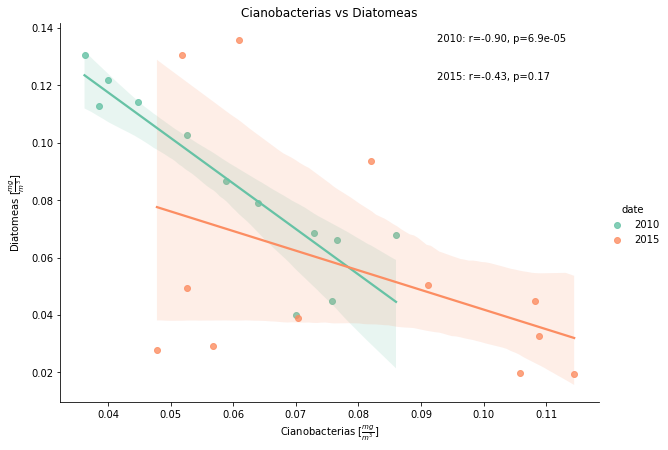

In [222]:
plot_correl(df_vs, 'cyan', 'diato', 
            title = 'Cianobacterias vs Diatomeas', 
            xlabel = r'Cianobacterias $[\frac{mg}{m^3}]$',
            ylabel = r'Diatomeas $[\frac{mg}{m^3}]$')
plt.savefig(pathdir+"cya_diat", dpi=300)
plt.show()

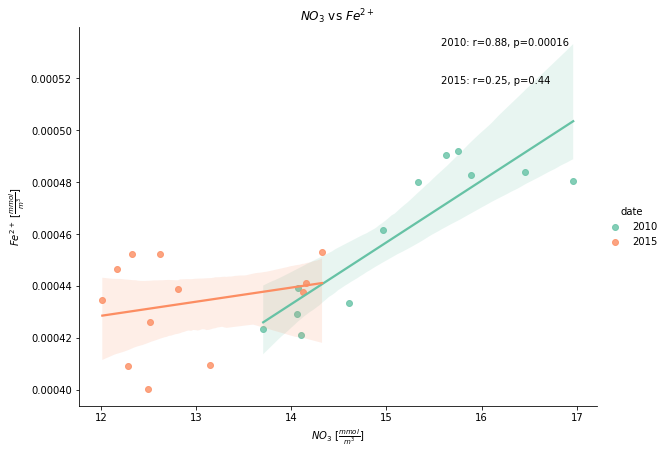

In [223]:
plot_correl(df_vs, 'NO', 'Fe', 
            title = r'$NO_3$ vs $Fe^{2+}$', 
            xlabel = r'$NO_3$ $[\frac{mmol}{m^3}]$',
            ylabel = r'$Fe^{2+}$ $[\frac{mmol}{m^3}]$')
plt.savefig(pathdir+"NO_Fe", dpi=300)
plt.show()

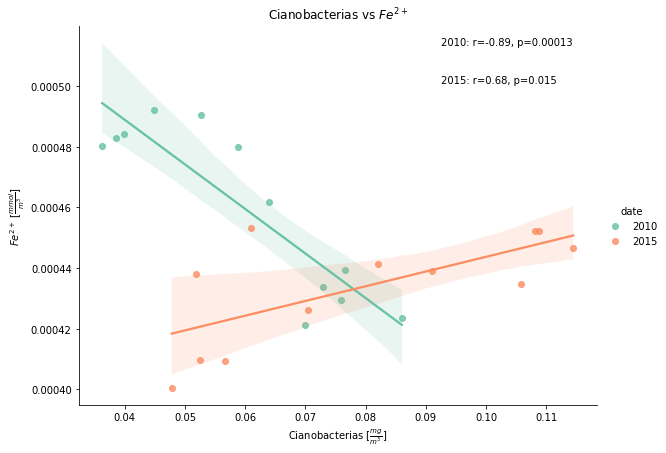

In [224]:
plot_correl(df_vs, 'cyan', 'Fe', 
            title = r'Cianobacterias vs $Fe^{2+}$', 
            xlabel = r'Cianobacterias $[\frac{mg}{m^3}]$',
            ylabel = r'$Fe^{2+}$ $[\frac{mmol}{m^3}]$')
plt.savefig(pathdir+"cya_Fe", dpi=300)
plt.show()

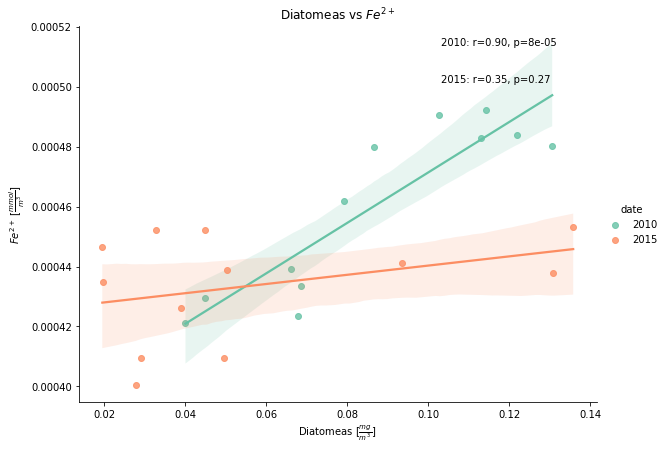

In [225]:
plot_correl(df_vs, 'diato', 'Fe', 
            title = r'Diatomeas vs $Fe^{2+}$', 
            xlabel = r'Diatomeas $[\frac{mg}{m^3}]$',
            ylabel = r'$Fe^{2+}$ $[\frac{mmol}{m^3}]$')
plt.savefig(pathdir+"diat_Fe", dpi=300)
plt.show()

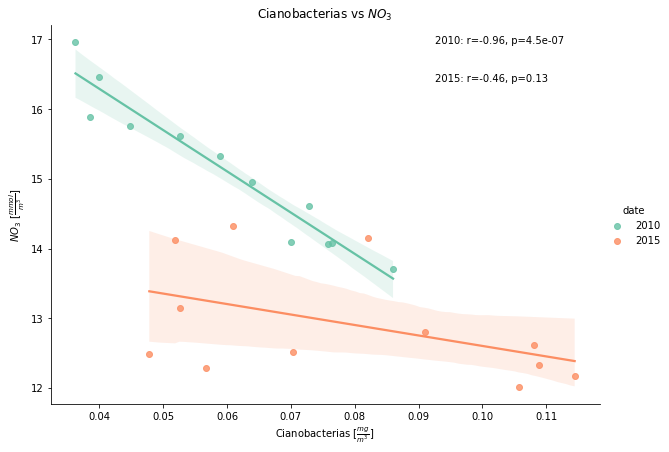

In [226]:
plot_correl(df_vs, 'cyan', 'NO',
            title = r'Cianobacterias vs $NO_3$', 
            xlabel = r'Cianobacterias $[\frac{mg}{m^3}]$',
            ylabel = r'$NO_3$ $[\frac{mmol}{m^3}]$')
plt.savefig(pathdir+"cya_NO", dpi=300)
plt.show()

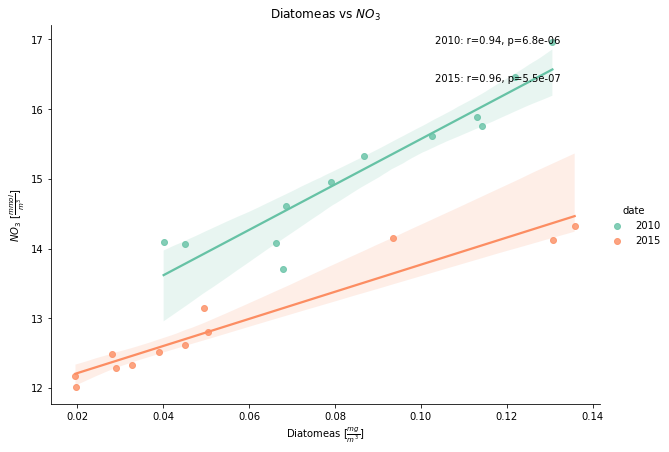

In [227]:
plot_correl(df_vs, 'diato', 'NO',
            title = r'Diatomeas vs $NO_3$', 
            xlabel = r'Diatomeas $[\frac{mg}{m^3}]$',
            ylabel = r'$NO_3$ $[\frac{mmol}{m^3}]$')
plt.savefig(pathdir+"diat_NO", dpi=300)
plt.show()